# SegRec7
Binary classification model for recognizing 7segmented displays.

Created by Matej Jech, Doshisha student ID: evgh3103

This is a testing/visualisation script used to show SegRec7 (defined in segrec7.py) performance.

In [1]:
from segrec7 import *
import random
import numpy as np
from IPython.display import Image, display
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Model and dataset loading

In [2]:
totorch = ToTensor()
textims = torch.load('data/segrec710k_dataset.npy')
train_data, valid_data, test_data = random_split(textims, [0.7, 0.2, 0.1], generator=torch.Generator().manual_seed(42))
train_loader, valid_loader, test_loader = create_data_loaders(train_data, valid_data, test_data, 1)
state_dict = torch.load("model_training/best_segrec7.pth")["model_state_dict"]
model = SegRec7()
model.load_state_dict(state_dict)
model.to(device)
model.eval()

SegRec7(
  (blocks): ModuleList(
    (0): ResNetBlock(
      (skip): Conv2d(3, 5, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (block): Sequential(
        (0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ResNetBlock(
      (skip): Conv2d(5, 10, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (block): Sequential(
        (0): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(10, 10, kernel_si

## Visualization on generated test dataset
Validation accuracy 98%

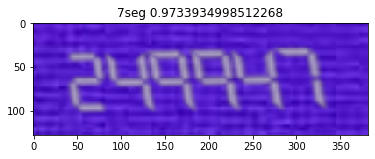

In [5]:
with torch.no_grad():
    i = random.sample(range(len(test_data)), 1)[0]
    imgs = test_data[i]['image']
    imgs = imgs.to(device).view(1, 3, 128, 382)
    img = np.squeeze(np.transpose(imgs.cpu().numpy(), [0,2,3,1]))
    out = model(imgs)
    
    plt.imshow(img, interpolation='nearest')
    plt.title(("7seg " if out >= 0.5 else "other ") + str(out.item()))
    plt.show()
    plt.close()

## Testing on real world data
Performace is worse than on generated data, this shows problems in the generation of training data.

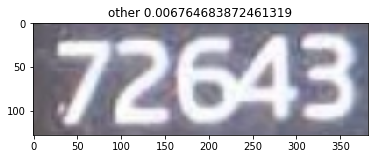

In [39]:
files = os.listdir("crops")
with torch.no_grad():
    scale = Rescale((128, 382))
    totorch = ToTensor()
    transform = transforms.Compose([scale,totorch])
    file = random.choice(files)
    img = cv2.imread("crops/" + file)
    # img = img.to(device).view(1, 3, 128, 382)
    img = {'image': img, 'label': None}
    img = transform(img)
    out = model(img["image"].to(device).view(1, 3, 128, 382))
    
    img = img['image'].to(device).view(1, 3, 128, 382)
    img = np.squeeze(np.transpose(img.cpu().numpy(), [0,2,3,1]))
    plt.imshow(img, interpolation='nearest')
    plt.title(("7seg " if out >= 0.5 else "other ") + str(out.item()))
    plt.show()